# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).  Imprima el encabezamiento de la tabla usando `head()`. 

In [31]:
import os, pandas, numpy, matplotlib, matplotlib.pyplot
direccion = "C:/Users/Asus/Downloads/ETVL-IPython-master (2)/ETVL-IPython-master/Taller"
listaArchivos=[]
listaInicial=os.walk(direccion)

# ESTA PARTE LISTA LOS ARCHIVOS DE EXCEL INCLUIDOS EN UNA CARPETA ESPECIFICADA. SE DESCARTAN LOS ARCHIVOS TEMPORALES Y/O 
# ARCHIVOS QUE SE ENCUENTREN EN SUBCARPETAS.

for Dire, CarpetasDentroDire, ArchivosDentroDire in listaInicial:
    if Dire == direccion:
        for nombres in ArchivosDentroDire:
#             print('Nombres: %s' % nombres)
            (nombreArchivo, extArchivo) = os.path.splitext(nombres)
            if nombreArchivo[0]=='~':
#                 print('No Almacenado')
                pass
            elif(extArchivo == ".xlsx"):
                listaArchivos.append(nombreArchivo+extArchivo)
#                 print('Almacenado')
            elif(extArchivo == ".xls"):
                listaArchivos.append(nombreArchivo+extArchivo)
#                 print('Almacenado')
            else:
#                 print('No Almacenado')
                pass
    else:
#         print('Carpeta Excluida')
        pass
print('Archivos a cargador:')
print(pandas.Series(listaArchivos).values)

Archivos a cargador:
['Precio_Bolsa_Nacional_($kwh)_1995.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_1996.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_1997.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_1998.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_1999.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2000.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2001.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2002.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2003.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2004.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2005.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2006.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2007.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2008.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2009.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2010.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2011.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2012.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2013.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2014.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2015.xlsx'
 'Precio_Bolsa_Nacional_($kwh)_2016.xls'
 'Precio_Bolsa_Nacional_($kwh)_2017.xls']


In [32]:
# ESTA PARTE CARGA LOS ARCHIVOS Y CARGA LOS DATOS EN UNA SOLA TABLA. NO SE CARGAN DATOS DE LAS HOJAS CUYOS NOMBRES SEAN "Hoja XX"
dataF=pandas.DataFrame()
for Archivo in listaArchivos:
#     print('Archivo=',Archivo)
    xl = pandas.ExcelFile(Archivo)
    hojas=xl.sheet_names
    skip=-1
    for hj in hojas:
        if hj[0:4] == 'Hoja':
            print( hj, 'del archivo', Archivo, 'descartada')
        else:
            dataini= xl.parse(hj)
            for i in range(0,len(dataini)):
                datamod= xl.parse(hj,skiprows=i)
                encabezado=datamod.columns
                if (encabezado[0])=='Fecha':
                    skip=i
                    break
        if skip>0:
            break
    datax=xl.parse(hj,skiprows=skip,parse_cols=24)
    dataF=dataF.append(datax,ignore_index=True)
#     print(dataF.shape)
dataF_sin_NA=dataF.dropna()
dataF_sin_dupli=dataF.drop_duplicates()
datos_limpios=dataF_sin_NA.drop_duplicates().reset_index(drop=True)
print('El tamaño tabla cargada es de', dataF.shape,'y tiene la siguiente forma:')
(dataF.head(3))


El tamaño tabla cargada es de (7962, 25) y tiene la siguiente forma:


,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073


In [33]:
#ESTA PARTE DEPURA Y REORGANIZA LOS DATOS
lista_horasDia=['00:00:00','01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00'
             , '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00'
             ,'12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00'
             , '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00']


lista_horas=['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12', '13', '14', '15', '16', '17', '18', '19', 
             '20', '21', '22', '23']
fechas=pandas.to_datetime(datos_limpios.Fecha)
for iorg in range(len(datos_limpios)):
    asd1=datos_limpios.ix[iorg,lista_horas].T.values
    asd2=pandas.DataFrame(asd1)
    temp1=datos_limpios.ix[iorg,'Fecha']
    temp2=[temp1]*24
    temp3=pandas.DataFrame(temp2)    
    horatemp1=pandas.DataFrame(lista_horasDia)    
    if iorg == 0:        
        dataxorg=asd2
        tempp=temp3
        horatemp=horatemp1
    else:
        datawass=[dataxorg,asd2]
        temppwas=[tempp,temp3]   
        horatempwas=[horatemp,horatemp1]
        dataxorg = pandas.concat(datawass, ignore_index = True)
        tempp=pandas.concat(temppwas, ignore_index = True)
        horatemp=pandas.concat(horatempwas,ignore_index = True)
hoora=[]
preec=[]
añomes1=[]
fechatotal=[]
solofecha=[]
for tg in range(len(tempp)):
    hoora.append(str(horatemp.ix[tg,0])[0:8])
    preec.append(str(dataxorg.ix[tg,0])[0:100])
    añomes1.append(str(tempp.ix[tg,0])[0:7]+'-01')
    solofecha.append(str(tempp.ix[tg,0])[0:10])
    fechatotal.append(str(tempp.ix[tg,0])[0:10]+' '+str(horatemp.ix[tg,0])[0:8])
solofecha=pandas.to_datetime(pandas.Series((solofecha)))
fechatotal=pandas.to_datetime(pandas.Series((fechatotal)))
df2 = pandas.DataFrame({'Fecha': pandas.Series(solofecha),'Hora': pandas.Series(hoora), 'Precio': preec})
df2['Precio'] = df2['Precio'].convert_objects(convert_numeric=True)

df4 = pandas.DataFrame({'Año': pandas.Series(fechatotal.dt.year),'Mes': pandas.Series(fechatotal.dt.month),
                        'Dia calendario': pandas.Series(fechatotal.dt.day), 'Dia': pandas.Series(fechatotal.dt.weekday_name),
                        'Hora': pandas.Series(fechatotal.dt.hour),'Precio': preec, 'Fecha Completa': fechatotal})
df4['Precio'] = df4['Precio'].convert_objects(convert_numeric=True)
añomes2=pandas.Series(añomes1)
añomes2=pandas.DataFrame(añomes2)
añomes=añomes2.drop_duplicates().reset_index(drop=True)
añomes3=[]
for tg in range(len(añomes)):
    añomes3.append(str(añomes.ix[tg,0]))
añosymeses=pandas.to_datetime(pandas.Series((añomes3)))
dias=fechas
print('El tamaño tabla depurada es de', df2.shape,'y tiene la siguiente forma:')
df2.head(3)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:43: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:48: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


El tamaño tabla depurada es de (189000, 3) y tiene la siguiente forma:


,Fecha,Hora,Precio
0,1995-07-21,00:00:00,1.073
1,1995-07-21,01:00:00,1.000
2,1995-07-21,02:00:00,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [34]:
print('Registros iniciales con Datos Faltantes =',len(dataF)-len(dataF_sin_NA))

Registros iniciales con Datos Faltantes = 28


**3.--** Compute e imprima el número de registros duplicados.

In [35]:
print('Registros iniciales Duplicados =',len(dataF)-len(dataF_sin_dupli))

Registros iniciales Duplicados = 67


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [36]:
print('Registros iniciales completos =',len(datos_limpios))

Registros iniciales completos = 7875


**5.--** Compute y grafique el precio primedio diario.

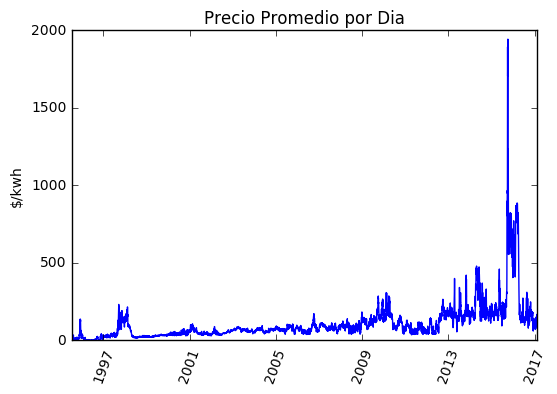

In [37]:
#ESTA PARTE COMPUTA PROMEDIOS Y GRAFICA EL PRECIO PROMEDIO DE CADA DÍA
promDia=df4.groupby(['Año', 'Mes', 'Dia calendario'])['Precio'].mean().values#['Precio'].mean()#.values
# print(promDia.shape)
promMes=df4.groupby(['Año', 'Mes'])['Precio'].mean().values
# print(promMes.shape)
matplotlib.pyplot.plot(dias, promDia)
matplotlib.pyplot.title("Precio Promedio por Dia")
matplotlib.pyplot.ylabel('$/kwh')
matplotlib.pyplot.xticks(rotation=70)
matplotlib.pyplot.show()

**6.--** Compute y grafique el precio máximo por mes.

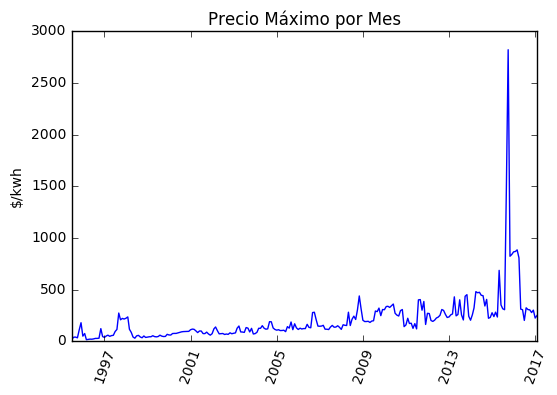

In [38]:
#ESTA PARTE EXTRÁE Y GRAFICA EL PRECIO MÁXIMO MENSUAL
maxMes=pandas.Series(df4.groupby(['Año', 'Mes'])['Precio'].max().values)
matplotlib.pyplot.plot(añosymeses,maxMes)
matplotlib.pyplot.title("Precio Máximo por Mes")
matplotlib.pyplot.ylabel('$/kwh')
matplotlib.pyplot.xticks(rotation=70)
matplotlib.pyplot.show()

**7.--** Compute y grafique el precio mínimo mensual.

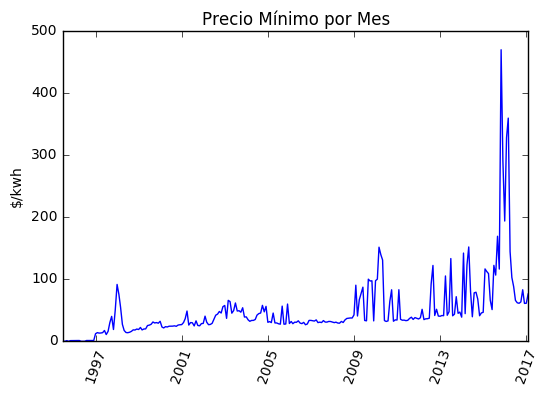

In [39]:
#ESTA PARTE EXTRÁE Y GRAFICA EL PRECIO MÍNIMO MENSUAL
minMes=pandas.Series(df4.groupby(['Año', 'Mes'])['Precio'].min().values)
matplotlib.pyplot.plot(añosymeses,minMes)
matplotlib.pyplot.title("Precio Mínimo por Mes")  
matplotlib.pyplot.ylabel('$/kwh')
matplotlib.pyplot.xticks(rotation=70)
matplotlib.pyplot.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

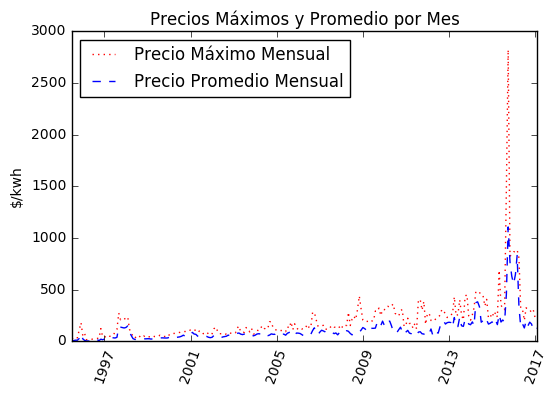

In [40]:

matplotlib.pyplot.plot(añosymeses, maxMes, linestyle=':', color='r',label='Precio Máximo Mensual')#marker='x', linestyle=':', color='b',label='Precio Máximo Mensual')
matplotlib.pyplot.ion() 
matplotlib.pyplot.plot(añosymeses, promMes, linestyle='--', color='b',label='Precio Promedio Mensual')#marker='o', linestyle='--', color='r',label='Precio Promedio Mensual')
matplotlib.pyplot.legend(loc="best")
matplotlib.pyplot.title("Precios Máximos y Promedio por Mes")  
matplotlib.pyplot.ylabel('$/kwh')
matplotlib.pyplot.xticks(rotation=70)
matplotlib.pyplot.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


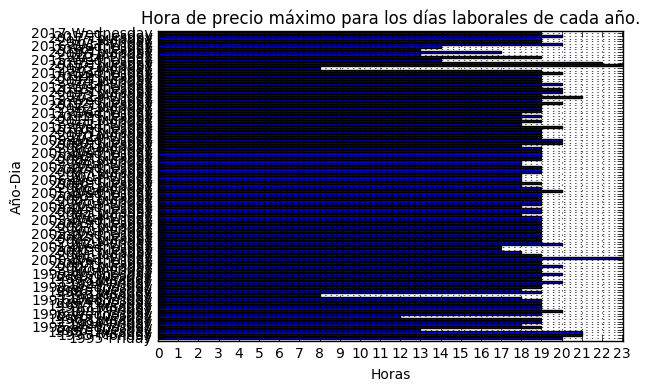

In [41]:

okm=df4.groupby(['Año','Dia', 'Hora'],as_index = False)['Precio'].max()
okm2=okm.groupby(['Año','Dia'],as_index = False)['Precio'].max()
colunasencomun=list(set(okm.columns) & set(okm2.columns))
okm3=pandas.merge(okm,okm2, on=colunasencomun, how='inner')
okm4=okm3.groupby(['Año','Dia'],as_index = False).max()
fechagrafhabil=[]
horagrafhabil=[]
fechagrafSAB=[]
horagrafSAB=[]
fechagrafDOM=[]
horagrafDOM=[]
for vbg in range(len(okm4)):
    if okm4.ix[vbg,'Dia']== 'Saturday':
        fechagrafSAB.append(str(okm4.ix[vbg,'Año'])+'-'+str(okm4.ix[vbg,'Dia']))
        horagrafSAB.append(str(okm4.ix[vbg,'Hora']))
    elif okm4.ix[vbg,'Dia']== 'Sunday':
        fechagrafDOM.append(str(okm4.ix[vbg,'Año'])+'-'+str(okm4.ix[vbg,'Dia']))
        horagrafDOM.append(str(okm4.ix[vbg,'Hora']))
    else:            
        fechagrafhabil.append(str(okm4.ix[vbg,'Año'])+'-'+str(okm4.ix[vbg,'Dia']))
        horagrafhabil.append(str(okm4.ix[vbg,'Hora']))

horagrafhabil=pandas.Series(horagrafhabil).convert_objects(convert_numeric=True)
horagrafSAB=pandas.Series(horagrafSAB).convert_objects(convert_numeric=True)
horagrafDOM=pandas.Series(horagrafDOM).convert_objects(convert_numeric=True)
indixx=numpy.arange(len(horagrafhabil))
matplotlib.pyplot.barh(indixx,horagrafhabil,align = "center")
matplotlib.pyplot.yticks(indixx, fechagrafhabil)
matplotlib.pyplot.xlabel('Horas')
matplotlib.pyplot.ylabel('Año-Dia')
matplotlib.pyplot.title('Hora de precio máximo para los días laborales de cada año.')
matplotlib.pyplot.xticks(numpy.arange(0,24,1))
matplotlib.pyplot.xlim(0,23.05)
matplotlib.pyplot.ylim(-1,len(horagrafhabil))
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

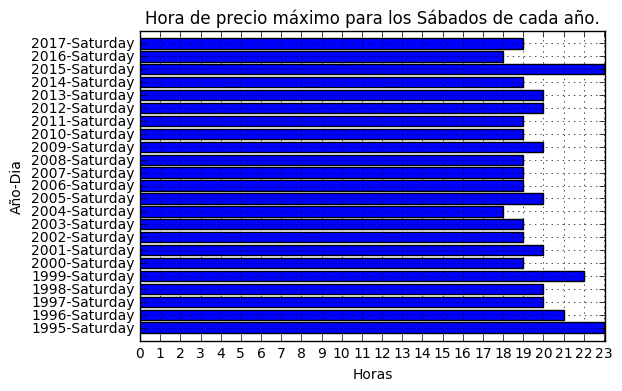

In [42]:
indixx=numpy.arange(len(horagrafSAB))
matplotlib.pyplot.barh(indixx,horagrafSAB,align = "center")
matplotlib.pyplot.yticks(indixx, fechagrafSAB)
matplotlib.pyplot.xlabel('Horas')
matplotlib.pyplot.ylabel('Año-Dia')
matplotlib.pyplot.title('Hora de precio máximo para los Sábados de cada año.')
matplotlib.pyplot.xticks(numpy.arange(0,24,1))
matplotlib.pyplot.xlim(0,23.05)
matplotlib.pyplot.ylim(-1,len(horagrafSAB))
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

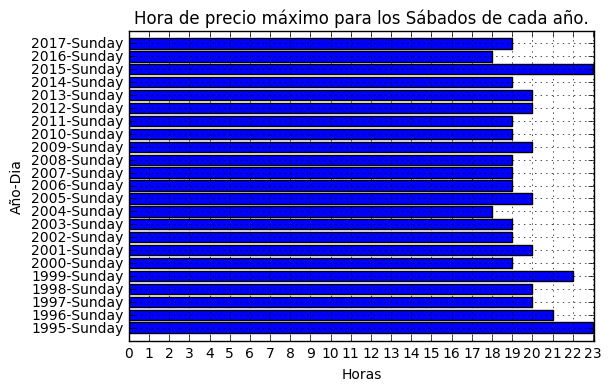

In [43]:
indixx=numpy.arange(len(horagrafDOM))
matplotlib.pyplot.barh(indixx,horagrafSAB,align = "center")
matplotlib.pyplot.yticks(indixx, fechagrafDOM)
matplotlib.pyplot.xlabel('Horas')
matplotlib.pyplot.ylabel('Año-Dia')
matplotlib.pyplot.title('Hora de precio máximo para los Sábados de cada año.')
matplotlib.pyplot.xticks(numpy.arange(0,24,1))
matplotlib.pyplot.xlim(0,23.05)
matplotlib.pyplot.ylim(-1,len(horagrafDOM))
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [44]:
# print(df4)

okm=df4.groupby(['Año','Dia', 'Hora'],as_index = False)['Precio'].min()
print('okm=',okm)
okm2=okm.groupby(['Año','Dia'],as_index = False)['Precio'].min()
print('okm2=',okm2)
colunasencomun=list(set(okm.columns) & set(okm2.columns))
okm3=pandas.merge(okm,okm2, on=colunasencomun, how='inner')
print('okm3=',okm3)
okm4=okm3.groupby(['Año','Dia'],as_index = False).min()
print('okm4=',okm4)
colunasencomun2=list(set(okm.columns) & set(okm2.columns))

okm=        Año        Dia  Hora      Precio
0     1995     Friday     0    0.000000
1     1995     Friday     1    0.000000
2     1995     Friday     2    0.000000
3     1995     Friday     3    0.000000
4     1995     Friday     4    0.000000
5     1995     Friday     5    0.463000
6     1995     Friday     6    0.463000
7     1995     Friday     7    1.000000
8     1995     Friday     8    0.463000
9     1995     Friday     9    0.463000
10    1995     Friday    10    1.073000
11    1995     Friday    11    1.073000
12    1995     Friday    12    0.463000
13    1995     Friday    13    0.463000
14    1995     Friday    14    0.463000
15    1995     Friday    15    0.463000
16    1995     Friday    16    0.463000
17    1995     Friday    17    0.463000
18    1995     Friday    18    1.073000
19    1995     Friday    19    1.073000
20    1995     Friday    20    1.073000
21    1995     Friday    21    1.000000
22    1995     Friday    22    0.000000
23    1995     Friday    23    0.00

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [45]:
promDia=df4.groupby(['Año', 'Mes', 'Dia calendario'],as_index = False)['Precio'].mean()#['Precio'].mean()#.values
print(promDia)
promMes=df4.groupby(['Año', 'Mes'],as_index = False)['Precio'].mean()
print(promMes)
promMescompara=[]
for thnm in range(len(promDia)):
    for ijn in range(len(promMes)):
        if ((promDia.ix(thnm,'Año')==promMes.ix(ijn,'Año'))):
            if (promDia.ix(thnm,'Mes')==promMes.ix(ijn,'Mes')):
                promMescompara.append(str(promMes.ix[ijn,'Precio']))
promMescompara=pandas.Series(promMescompara)
promMescompara= promMescompara.convert_objects(convert_numeric=True)
print(promMescompara)
            
            
                                                            
    

       Año  Mes  Dia calendario      Precio
0     1995    7              21    4.924333
1     1995    7              22    1.269500
2     1995    7              23    0.953083
3     1995    7              24    4.305917
4     1995    7              25    1.149167
5     1995    7              26    1.108625
6     1995    7              27    0.585958
7     1995    7              28    0.499792
8     1995    7              29    0.927667
9     1995    7              30    0.669458
10    1995    7              31    0.679458
11    1995    8               1    1.106917
12    1995    8               2    1.077500
13    1995    8               3    1.517917
14    1995    8               4    1.786042
15    1995    8               5    2.383792
16    1995    8               6    2.387583
17    1995    8               7    3.707208
18    1995    8               8    6.650000
19    1995    8               9   13.991958
20    1995    8              10   20.041667
21    1995    8              11 

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

---